# **1. Mengimport Library & Menampilkan Grafik Inline**

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# **2. Fungsi Transformasi**

In [28]:
def translate(points, tx, ty):
    return points + np.array([tx, ty])

def rotate(points, theta_deg, origin=(0,0)):
    theta = np.deg2rad(theta_deg)
    R = np.array([[np.cos(theta), -np.sin(theta)],
                  [np.sin(theta),  np.cos(theta)]])
    origin = np.array(origin)
    return (points - origin) @ R.T + origin

def scale(points, sx, sy=None, origin=(0,0)):
    if sy is None:
        sy = sx
    S = np.array([[sx, 0],
                  [0, sy]])
    origin = np.array(origin)
    return (points - origin) @ S.T + origin

# **3. Fungsi untuk menampilkan hasil**

In [29]:
def show_plot(original, transformed, label1, label2, title):
    plt.figure(figsize=(6,6))
    plt.plot(np.append(original[:,0], original[0,0]),
             np.append(original[:,1], original[0,1]),
             marker='o', label=label1)
    plt.plot(np.append(transformed[:,0], transformed[0,0]),
             np.append(transformed[:,1], transformed[0,1]),
             marker='o', label=label2)
    plt.axhline(0, color='gray', linewidth=0.5)
    plt.axvline(0, color='gray', linewidth=0.5)
    plt.gca().set_aspect('equal', 'box')
    plt.legend()
    plt.title(title)
    plt.grid(True)
    plt.show()

# **4. Poligon awal**

In [30]:
original = np.array([[1.0, 1.0],
                     [3.0, 1.0],
                     [2.0, 3.0]])
print("Koordinat original:")
for i,(x,y) in enumerate(original, start=1):
    print(f"P{i}: ({x}, {y})")

Koordinat original:
P1: (1.0, 1.0)
P2: (3.0, 1.0)
P3: (2.0, 3.0)


# **5. Translasi**

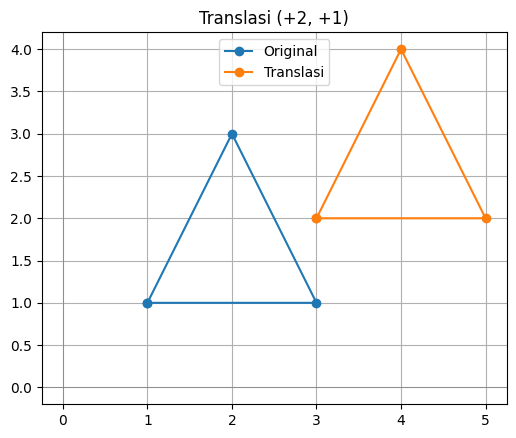

Koordinat hasil translasi:
P1: (3.00, 2.00)
P2: (5.00, 2.00)
P3: (4.00, 4.00)


In [31]:
tx, ty = 2, 1
translated = translate(original, tx, ty)
show_plot(original, translated, 'Original', 'Translasi', f'Translasi (+{tx}, +{ty})')

print("Koordinat hasil translasi:")
for i,(x,y) in enumerate(translated, start=1):
    print(f"P{i}: ({x:.2f}, {y:.2f})")

# **6. Rotasi**

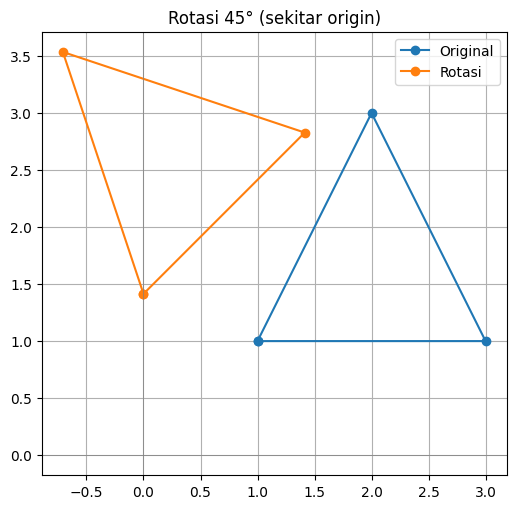

Koordinat hasil rotasi:
P1: (0.00, 1.41)
P2: (1.41, 2.83)
P3: (-0.71, 3.54)


In [32]:
theta = 45
rotated = rotate(original, theta, origin=(0,0))
show_plot(original, rotated, 'Original', 'Rotasi', f'Rotasi {theta}° (sekitar origin)')

print("Koordinat hasil rotasi:")
for i,(x,y) in enumerate(rotated, start=1):
    print(f"P{i}: ({x:.2f}, {y:.2f})")

# **7. Dilatasi (Zoom In dan Zoom Out)**

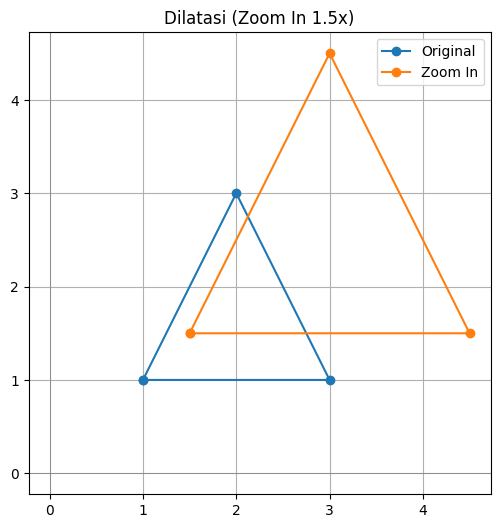

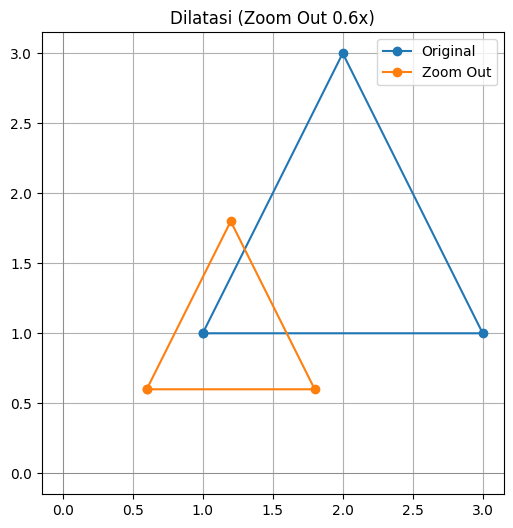

Koordinat Zoom In:
P1: (1.50, 1.50)
P2: (4.50, 1.50)
P3: (3.00, 4.50)

Koordinat Zoom Out:
P1: (0.60, 0.60)
P2: (1.80, 0.60)
P3: (1.20, 1.80)


In [33]:
zoom_in = scale(original, 1.5, origin=(0,0))
zoom_out = scale(original, 0.6, origin=(0,0))

show_plot(original, zoom_in, 'Original', 'Zoom In', 'Dilatasi (Zoom In 1.5x)')
show_plot(original, zoom_out, 'Original', 'Zoom Out', 'Dilatasi (Zoom Out 0.6x)')

print("Koordinat Zoom In:")
for i,(x,y) in enumerate(zoom_in, start=1):
    print(f"P{i}: ({x:.2f}, {y:.2f})")

print("\nKoordinat Zoom Out:")
for i,(x,y) in enumerate(zoom_out, start=1):
    print(f"P{i}: ({x:.2f}, {y:.2f})")

# Perhitungan Manual (contoh diambil satu titik)
Contoh: P1 = (1,1)

1. Translasi (t = (2,1)):
   P1' = (1+2, 1+1) = (3,2)

2. Rotasi 45° CCW (sekitar origin):
   Gunakan matriks rotasi. Hitung di code untuk akurasi.

3. Dilatasi s=1.5:
   P1'' = (1*1.5, 1*1.5) = (1.5, 1.5)

In [34]:
p = np.array([1.0, 1.0])
p_trans = translate(p, 2, 1)
p_rot = rotate(p.reshape(1,2), 45, origin=(0,0))[0]
p_zoom = scale(p.reshape(1,2), 1.5, origin=(0,0))[0]
print("Manual - P(1,1):")
print("Translasi ->", p_trans)
print("Rotasi 45° ->", np.round(p_rot,4))
print("Zoom 1.5 ->", p_zoom)

Manual - P(1,1):
Translasi -> [3. 2.]
Rotasi 45° -> [0.     1.4142]
Zoom 1.5 -> [1.5 1.5]
